# Run Unravel on CSAPR2

In [35]:
import pyart
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [33]:
import unravel

In [3]:
radar = pyart.io.read("bnfcsapr2cfrS3.a1.20250520.233012.nc")

In [23]:
vel_texture = pyart.retrieve.calculate_velocity_texture(radar,
                                                        vel_field='mean_doppler_velocity',
                                                        nyq=16.5)
radar.add_field('texture', vel_texture, replace_existing=True)
gatefilter = pyart.filters.GateFilter(radar)
#gatefitler = pyart.correct.despeckle_field(radar, "mean_doppler_velocity")
gatefilter.exclude_above('texture', 5)


In [24]:
gatefilter.gate_excluded

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False,  True, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]],
      shape=(5404, 1100))

In [25]:
vel = unravel.unravel_3D_pyart(radar,
                               gatefilter=gatefilter, 
                               velname="mean_doppler_velocity",
                               dbzname="reflectivity",
                               nyquist_velocity=13.3)

In [30]:
radar.add_field_like("mean_doppler_velocity", "corrected_velocity", vel)

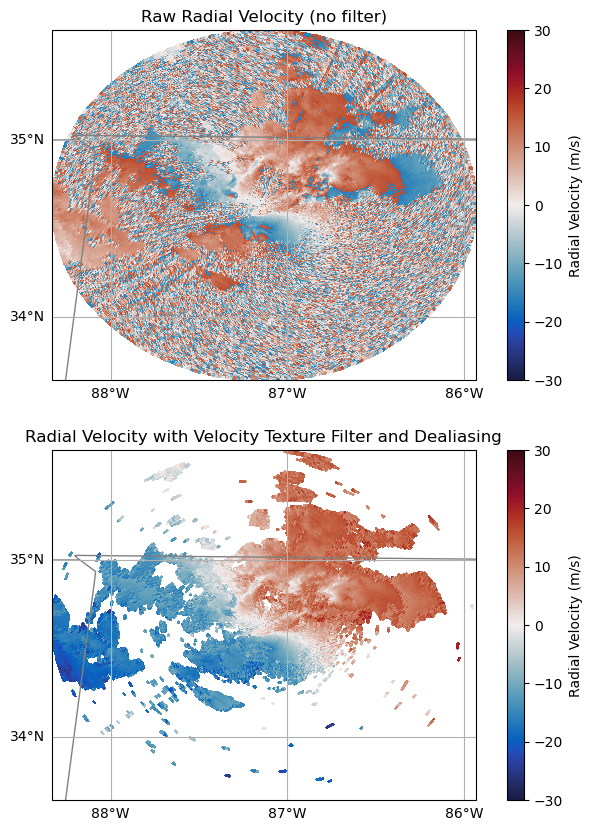

In [36]:
# Plot our Unfiltered Data
fig = plt.figure(figsize=[8, 10])
ax = plt.subplot(211, projection=ccrs.PlateCarree())
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('mean_doppler_velocity',
                     title='Raw Radial Velocity (no filter)',
                     ax=ax,
                     sweep=0,
                     resolution='50m',
                     vmin=-30,
                     vmax=30,
                     projection=ccrs.PlateCarree(),
                     colorbar_label='Radial Velocity (m/s)',
                     cmap='balance')

ax2 = plt.subplot(2,1,2,projection=ccrs.PlateCarree())

# Plot our filtered, dealiased data
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('corrected_velocity',
                     title='Radial Velocity with Velocity Texture Filter and Dealiasing',
                     ax=ax2,
                     sweep=0,
                     resolution='50m',
                     vmin=-30,
                     vmax=30, 
                     projection=ccrs.PlateCarree(),
                     gatefilter=gatefilter,
                     colorbar_label='Radial Velocity (m/s)',
                     cmap='balance')
plt.show()

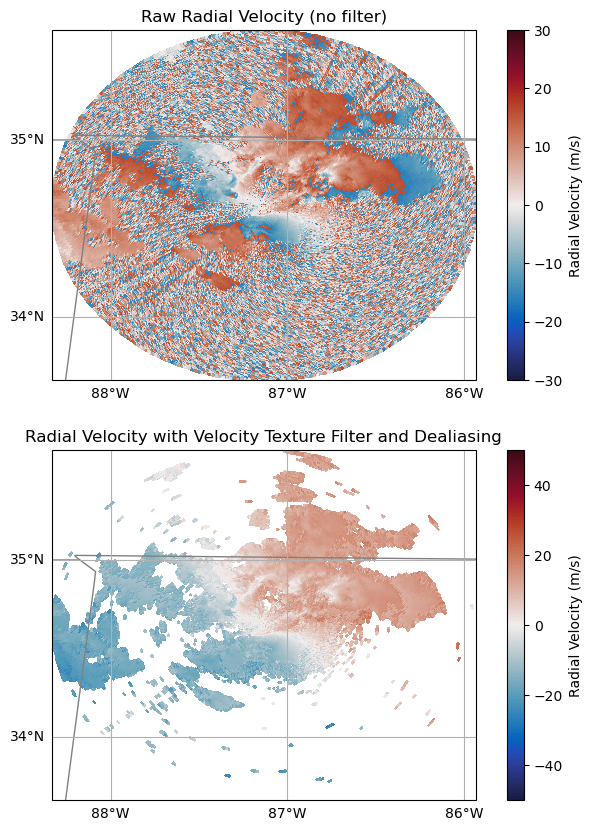

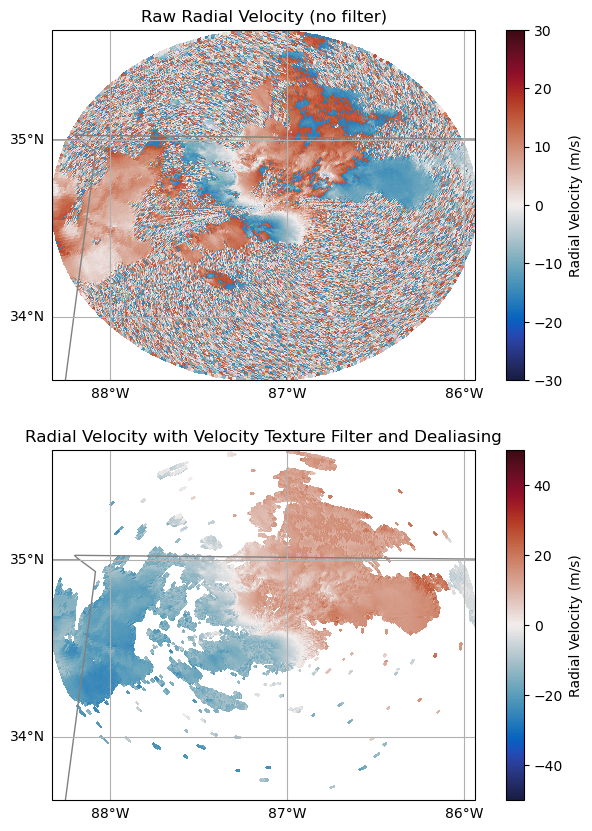

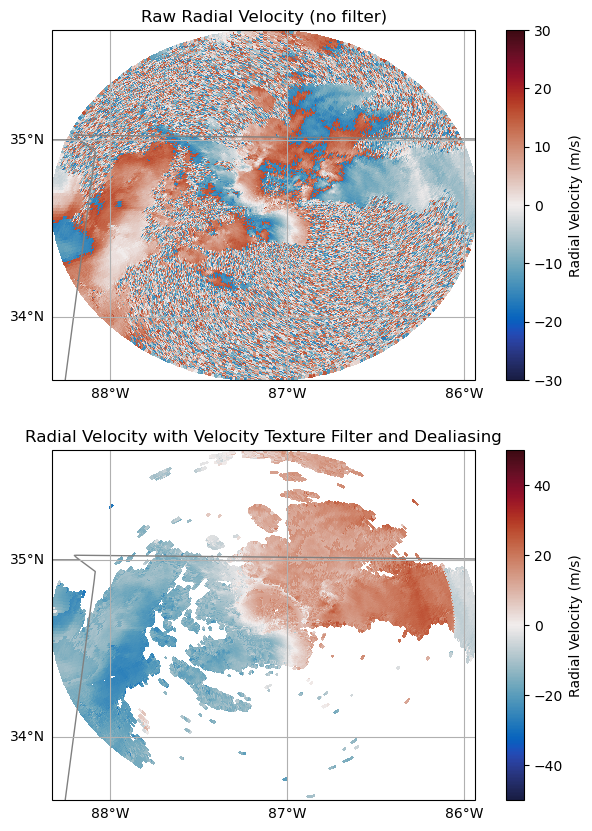

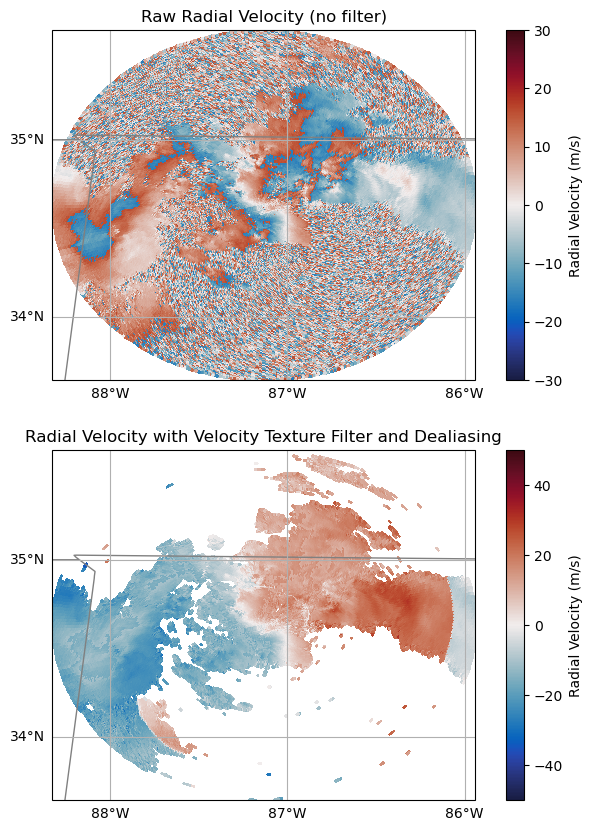

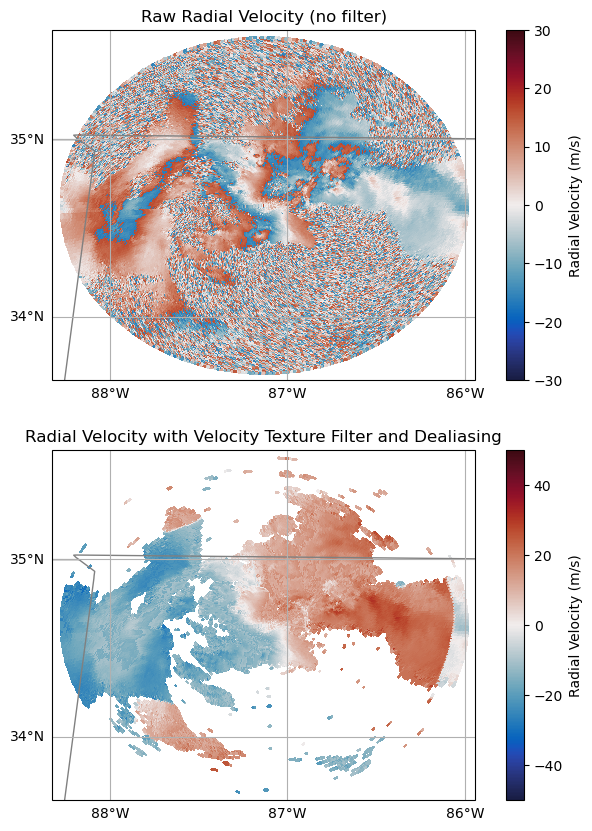

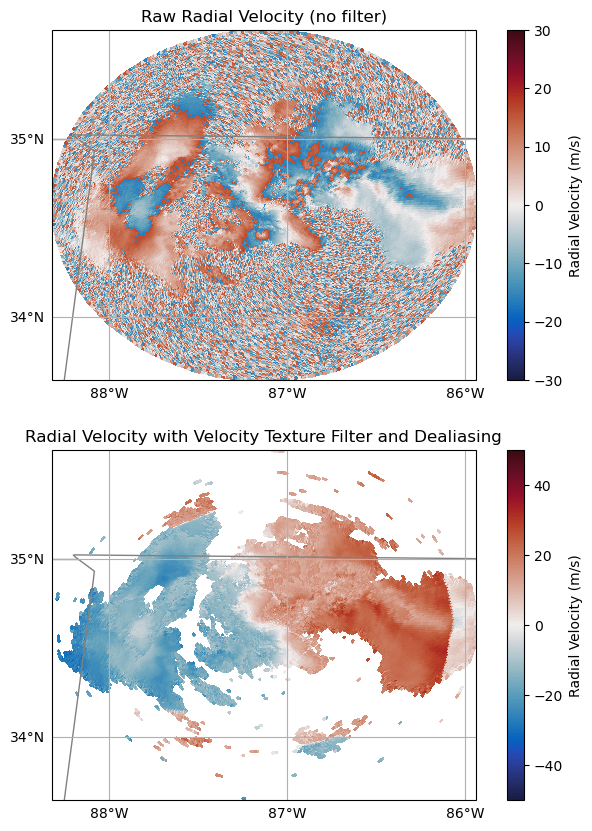

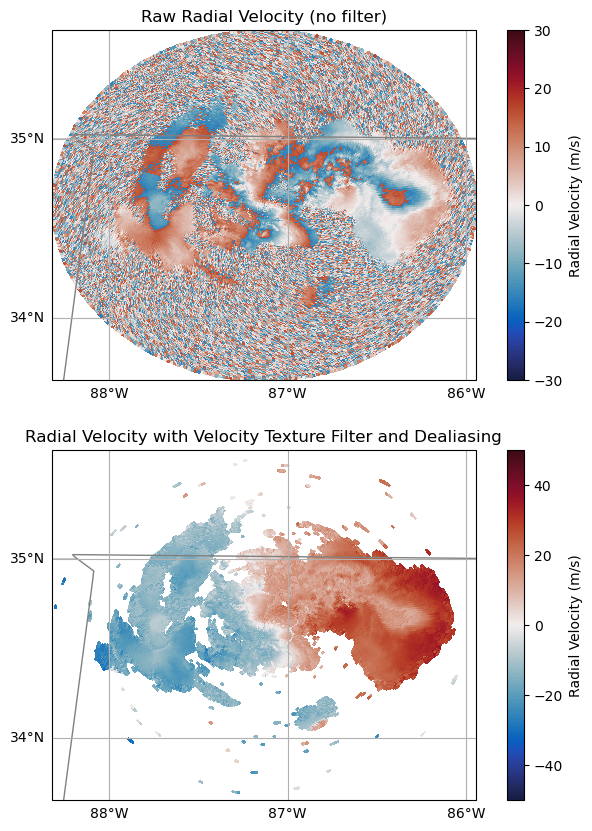

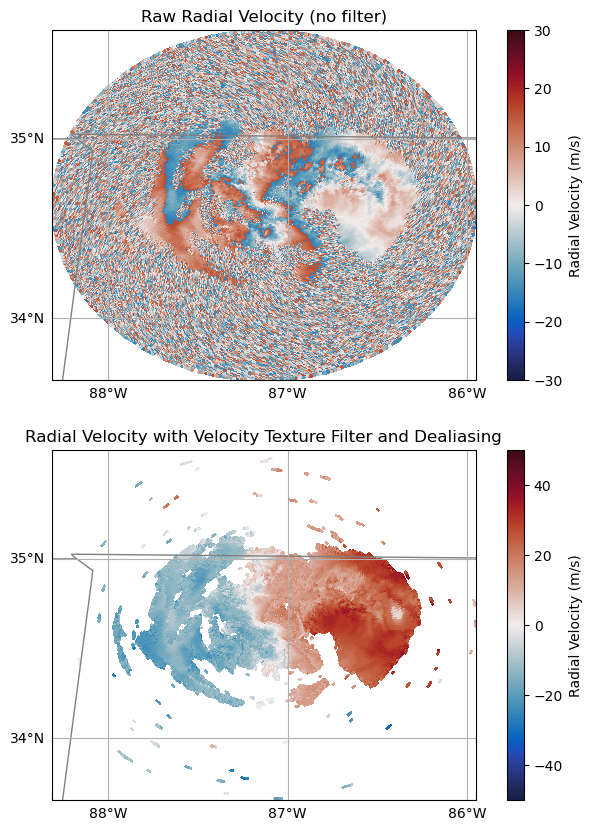

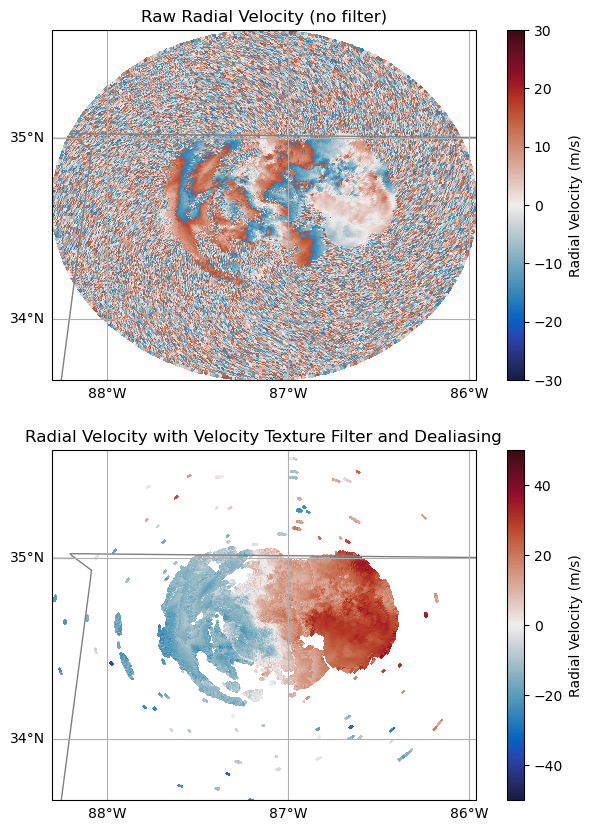

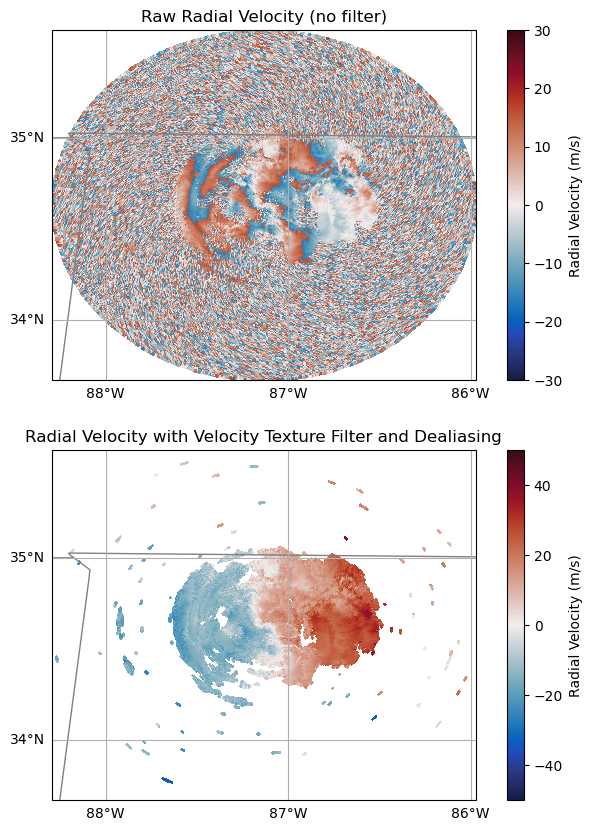

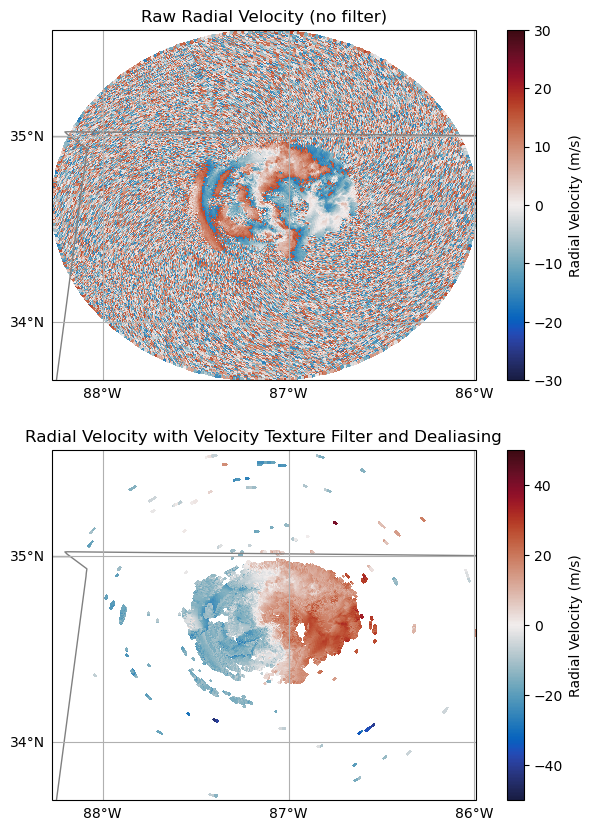

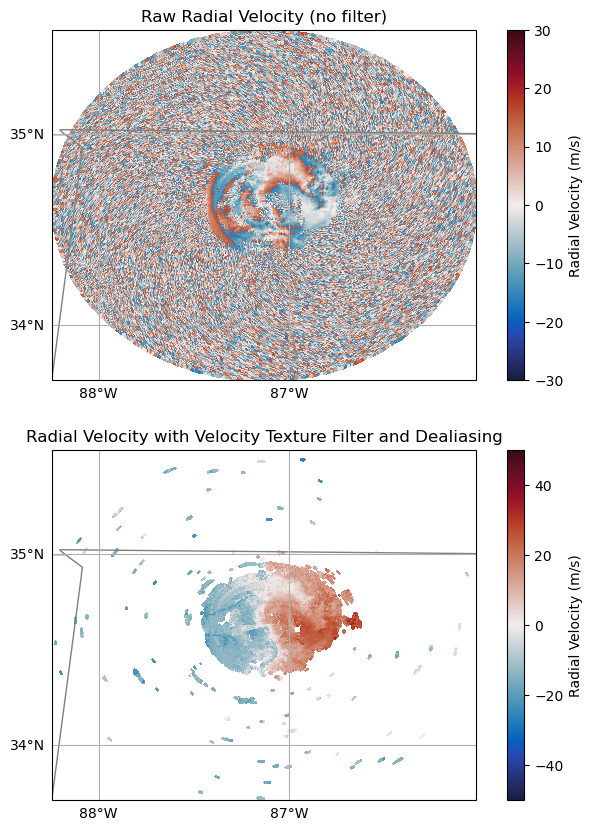

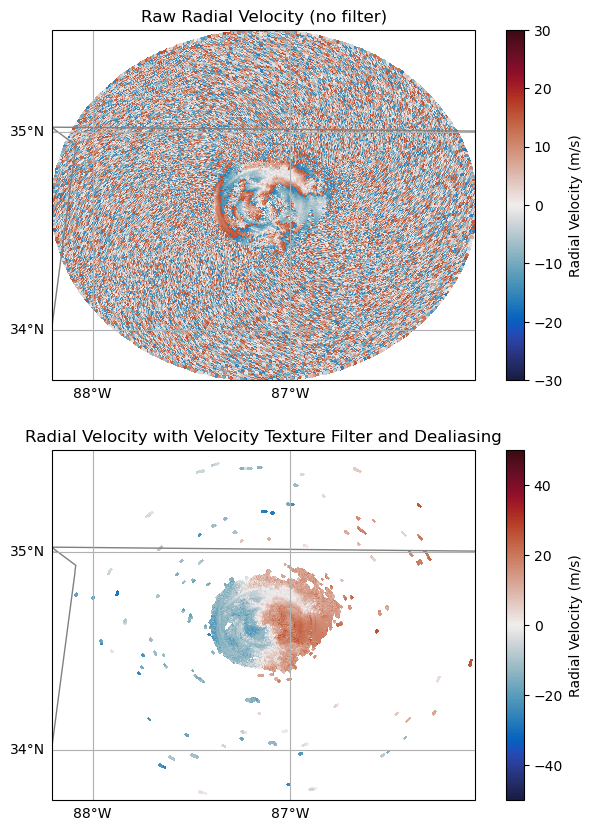

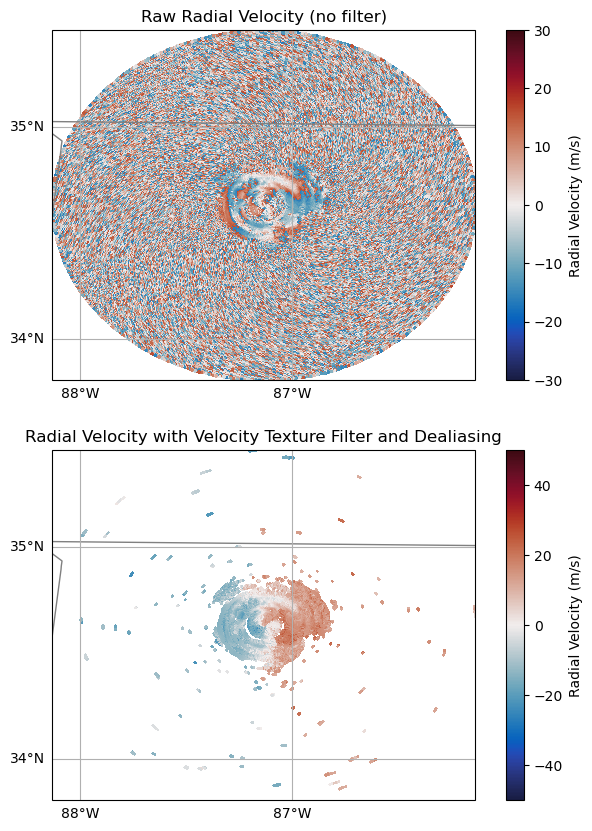

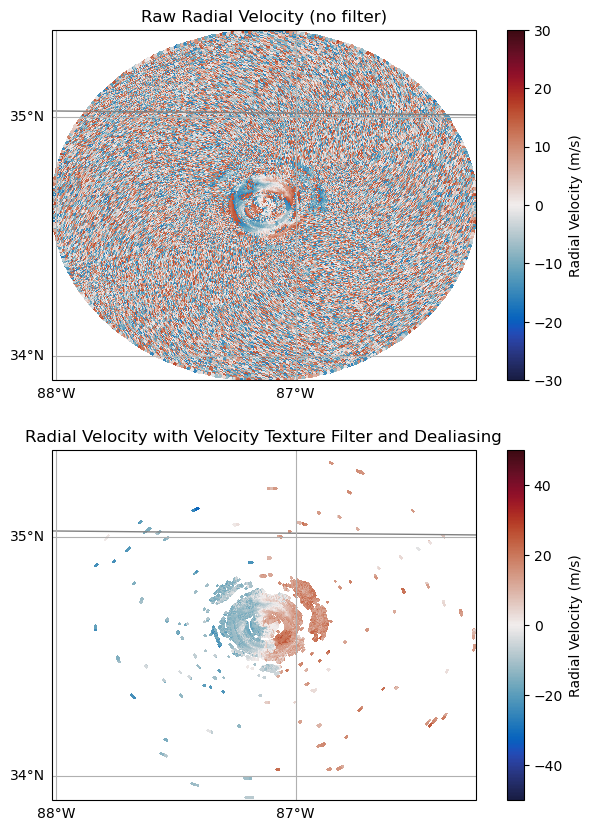

In [37]:
for sweep in range(0, radar.nsweeps):
    # Plot our Unfiltered Data
    fig = plt.figure(figsize=[8, 10])
    ax = plt.subplot(211, projection=ccrs.PlateCarree())
    display = pyart.graph.RadarMapDisplay(radar)
    display.plot_ppi_map('mean_doppler_velocity',
                         title='Raw Radial Velocity (no filter)',
                         ax=ax,
                         sweep=sweep,
                         resolution='50m',
                         vmin=-30,
                         vmax=30,
                         projection=ccrs.PlateCarree(),
                         colorbar_label='Radial Velocity (m/s)',
                         cmap='balance')
    
    ax2 = plt.subplot(2,1,2,projection=ccrs.PlateCarree())
    
    # Plot our filtered, dealiased data
    display = pyart.graph.RadarMapDisplay(radar)
    display.plot_ppi_map('corrected_velocity',
                         title='Radial Velocity with Velocity Texture Filter and Dealiasing',
                         ax=ax2,
                         sweep=sweep,
                         resolution='50m',
                         vmin=-50,
                         vmax=50, 
                         projection=ccrs.PlateCarree(),
                         gatefilter=gatefilter,
                         colorbar_label='Radial Velocity (m/s)',
                         cmap='balance')
    plt.show()
    plt.close()

In [61]:
z_grid_limits = (0.,15_000.)
y_grid_limits = (-50_000.,50_000.)
x_grid_limits = (-50_000.,50_000.)

grid_resolution = 500

def compute_number_of_points(extent, resolution):
    return int((extent[1] - extent[0])/resolution)

z_grid_points = compute_number_of_points(z_grid_limits, grid_resolution)
z_grid_points

x_grid_points = compute_number_of_points(x_grid_limits, grid_resolution)
y_grid_points = compute_number_of_points(y_grid_limits, grid_resolution)

print(z_grid_points,
      y_grid_points,
      x_grid_points)

grid = pyart.map.grid_from_radars([radar],
                                  grid_shape=(z_grid_points,
                                              y_grid_points,
                                              x_grid_points),
                                  grid_limits=(z_grid_limits,
                                               y_grid_limits,
                                               x_grid_limits),
                                  roi_func='constant',
                                  roi=500,
                                 )
grid

30 200 200


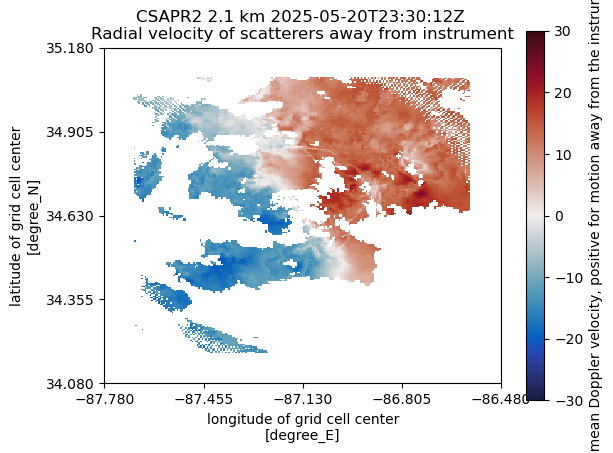

In [62]:
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid('corrected_velocity',
                  level=4,
                  cmap='balance')

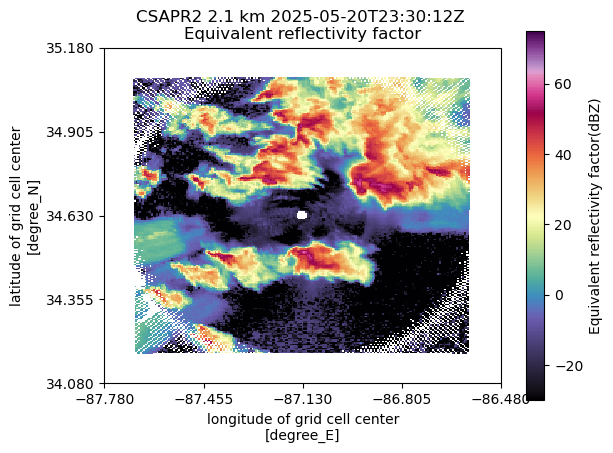

In [63]:
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid('reflectivity',
                  level=4,
                  cmap='ChaseSpectral')